<a href="https://colab.research.google.com/github/KaoriMI/Coursera_Capstone/blob/master/Assignment_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
!pip install q keras==2.11.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime, os

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns; sns.set()

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)

In [4]:
# Import mnist data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Number of training and test dataset 
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [5]:
# Check shape
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
# Scale the data points (images) to be in [-1, 1] (pixel values's range is [0, 255]):
X_train, X_test = X_train / 127.5 -1, X_test / 127.5 -1

In [7]:
# vectorise the datapoints for visualisation
nb_features = np.prod (X_train.shape[1:])
X_train.resize((n_train, nb_features))
X_test.resize((n_test, nb_features))

In [8]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

## Task 1:PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(2)

In [10]:
# Project the training data points in a 2-D space.
projected = pca.fit_transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", projected.shape)

original shape:    (60000, 784)
transformed shape: (60000, 2)


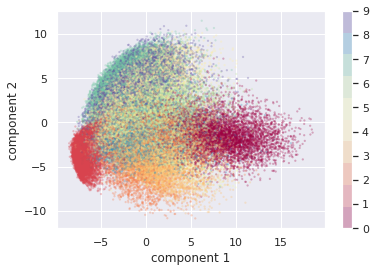

In [11]:
plt.scatter(projected[:, 0], projected[:, 1],c=y_train, s=5,
            edgecolor='none', alpha=0.3,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [12]:
# Transform projected data into dataframe to separate plot
df = pd.DataFrame(projected)

In [13]:
df['class'] = y_train

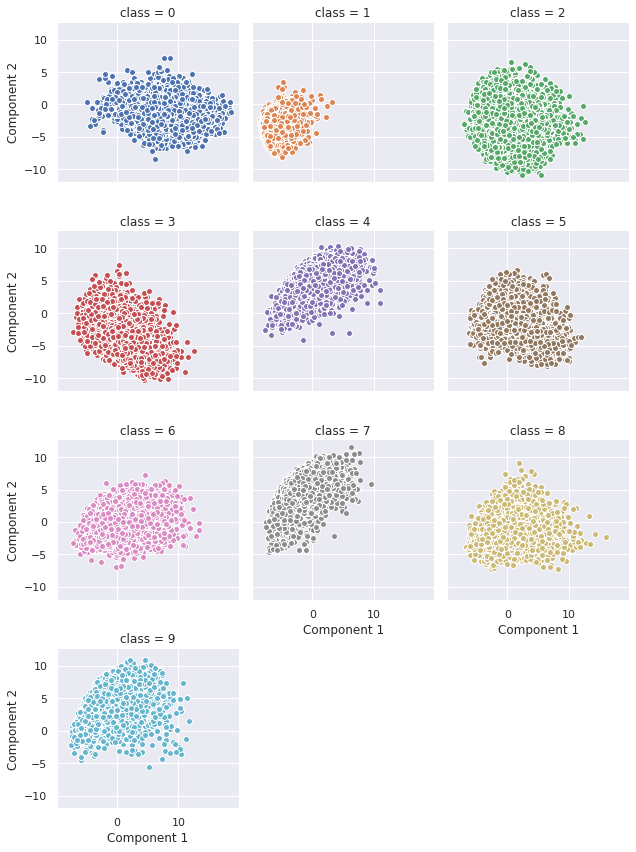

In [14]:
# Plot training data per class
g = sns.FacetGrid(df, col="class", hue="class", col_wrap=3)
g = (g.map(plt.scatter, 0, 1, edgecolor="w"))
g.set_axis_labels("Component 1", "Component 2")

Check if any of the class can be linearly separated from others.

In [15]:
def select_class(y_train, y_test, cls):
  """
  This function will create two class: one is selected number and the other is the rest of the numbers.
  """
  y_train[y_train == cls] = 1
  y_test[y_test  == cls]  = 1
  y_train[y_train != cls] = -1 
  y_test[y_test  != cls]  = -1 
  return y_train, y_test

In [17]:
def build_LR_model(X_train, y_train, batch=50, epo=15, spl=0.2):
  """
  This function build linear model with perceptron.
  """
  model = Sequential()
  model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, batch_size=batch, epochs=epo, validation_split=spl, verbose=0)
  return history, model

In [18]:
def plot_figure(history, xl=120, yl=1):
  fig = plt.figure()
  fig.add_subplot(1,2,1)
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.legend()
  plt.grid(True)
  plt.xlim([0,xl])
  plt.ylim([0,yl])
  plt.xlabel('epoch')

  fig.add_subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='train accuracy')
  plt.plot(history.history['val_accuracy'], label='val accuracy')
  plt.legend()
  plt.grid(True)
  plt.xlim([0,xl])
  plt.ylim([0,yl])
  plt.xlabel('epoch')


In [19]:
# Transform test data into 2D
projected_test = pca.transform(X_test)

In [20]:
# Check if any of the class are linearly separable from others.
for cls in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  print('----------------')
  binary_y_train, binary_y_test = select_class(y_train, y_test, cls)
  history, model = build_LR_model(projected, binary_y_train, batch=50, epo=15)
  print('----------------')
  results = model.evaluate(projected_test, binary_y_test, batch_size=50)
  print(f"Epoch: Class {cls}: test loss: {results[0]}, test acc:{results[1]}")

----------------
----------------
200/200 [==============================] - 0s 2ms/step - loss: -3616.6492 - accuracy: 0.0000e+00
Epoch: Class 0: test loss: -3616.649169921875, test acc:0.0
----------------
----------------
200/200 [==============================] - 0s 2ms/step - loss: -3660.5652 - accuracy: 0.0000e+00
Epoch: Class 1: test loss: -3660.565185546875, test acc:0.0
----------------
----------------
200/200 [==============================] - 0s 1ms/step - loss: -3634.3008 - accuracy: 0.0000e+00
Epoch: Class 2: test loss: -3634.30078125, test acc:0.0
----------------
----------------
200/200 [==============================] - 0s 2ms/step - loss: -3582.7500 - accuracy: 0.0000e+00
Epoch: Class 3: test loss: -3582.75, test acc:0.0
----------------
----------------
200/200 [==============================] - 0s 2ms/step - loss: -3614.9480 - accuracy: 0.0000e+00
Epoch: Class 4: test loss: -3614.947998046875, test acc:0.0
----------------
----------------
200/200 [================

In [21]:
# import itertools

# pairs = itertools.combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2)
# for pair in pairs:
#   print('----------------')
#   binary_X_train, binary_X_test, binary_y_train, binary_y_test = select_two_class(projected, projected_test, y_train, y_test, pair[0], pair[1])
#   history, model = build_LR_model(binary_X_train, binary_y_train, batch=50, epo=10)
#   # plot_figure(history, xl=10)

#   print('----------------')
#   results = model.evaluate(binary_X_test, binary_y_test, batch_size=50)
#   print(f"Class {pair[0]} & {pair[1]}: test loss, test acc:", results)

### Task 2: Perceptrons

In [27]:
def select_two_class(X_train, X_test, y_train, y_test, cls_1, cls_2):
  """
  This function will select two class and return updated training and test data.
  """
  cond_train = (y_train == cls_1) + (y_train == cls_2)
  binary_X_train = X_train[cond_train, :]
  binary_y_train = y_train[cond_train]*1.

  cond_test = (y_test == cls_1) + (y_test == cls_2)
  binary_X_test = X_test[cond_test, :]
  binary_y_test = y_test[cond_test]*1.

  binary_y_train[binary_y_train == cls_1] = -1
  binary_y_train[binary_y_train == cls_2] = 1 

  
  binary_y_test[binary_y_test == cls_1] = -1
  binary_y_test[binary_y_test == cls_2] = 1 

  return binary_X_train, binary_X_test, binary_y_train, binary_y_test

In [28]:
# Process training data 
binary_X_train_01, binary_X_test_01, binary_y_train_01, binary_y_test_01 = select_two_class(X_train, X_test, y_train, y_test, 0, 1)

In [25]:
# Process training data and select only 0 and 1.
cond = (y_train == 0) + (y_train == 1)
binary_X_train_01 = X_train[cond, :]
binary_y_train_01 = y_train[cond]*1.

binary_y_train_01[binary_y_train_01 == 0] = -1
binary_y_train_01[binary_y_train == 1] = 1 

In [26]:
# Do the same for test data.
cond = (y_test == 0) + (y_test == 1)
binary_X_test = X_test[cond, :]
binary_y_test = y_test[cond]*1.

binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 1] = 1 

In [79]:
print(binary_X_train, y_train)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]] [5 0 4 ... 5 6 8]


### Task 2.1: Predict function

In [68]:
def predict(x, w, b):
  """
  x : vector with feature dimentionality of m
  w : vector with m dimention
  b : value
  """
  activation = b
  z = np.dot(x, w) + b
  for i in range(len(w)):
      activation += x[i] * w[i] + b
  prediction = 1. if activation >= 0.0 else -1.
  return prediction

### Task 2.2: Optimise function

In [90]:
def optimize(x, y):
    """
    learning_rate is hardcorded with 0.001
    """
    iter = 0
    error= np.inf 
    n, m = x.shape
    w = np.random.rand(m) # initialise the w vextor
    b = np.random.rand()  # initialise the b vector
    L = np.zeros(1000) # save error for visualisation
    while(iter <= 1000) & (error > 1e-3):
        iter += 1
        error_sum = 0
        for i in range(n):
            pred  = predict(x[i], w, b) 
            error = y[i] - pred
            w = w + 0.001 * error * x[i]
            b = b + 0.001 * error
            error_sum += error**2
        error = error_sum/n
        L[iter -1] = error
        print(f'iteration: {iter}, error: {error}')
    return w, b, error, L

In [91]:
w, b, error, L = optimize(binary_X_train, binary_y_train)

iteration: 1, error: 0.29561784445321754
iteration: 2, error: 0.029688116857481246
iteration: 3, error: 0.019581523884721674
iteration: 4, error: 0.015159889459139361
iteration: 5, error: 0.012949072246348203
iteration: 6, error: 0.01231741018555073
iteration: 7, error: 0.010738255033557046
iteration: 8, error: 0.011054086063955783
iteration: 9, error: 0.01042242400315831
iteration: 10, error: 0.0094749309119621
iteration: 11, error: 0.008843268851164626
iteration: 12, error: 0.009790761942360837
iteration: 13, error: 0.008211606790367153
iteration: 14, error: 0.007895775759968417
iteration: 15, error: 0.007579944729569681
iteration: 16, error: 0.006316620607974733
iteration: 17, error: 0.0056849585471772605
iteration: 18, error: 0.006000789577575997
iteration: 19, error: 0.006948282668772207
iteration: 20, error: 0.0056849585471772605
iteration: 21, error: 0.005053296486379787
iteration: 22, error: 0.005053296486379787
iteration: 23, error: 0.005053296486379787
iteration: 24, error: 0

In [92]:
# get prediction on test data
y_pred = np.zeros(binary_X_test.shape[0])
for row in range(binary_X_test.shape[0]):
    y_pred[row] = predict(binary_X_test[row], w, b)


In [93]:
# accuracy rate of test data
(y_pred == binary_y_test).sum()/binary_X_test.shape[0]

0.9990543735224586

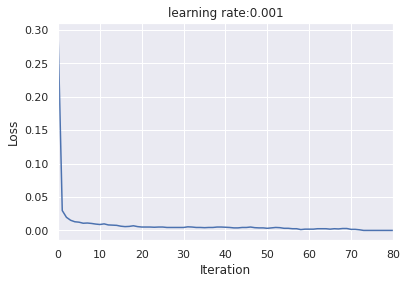

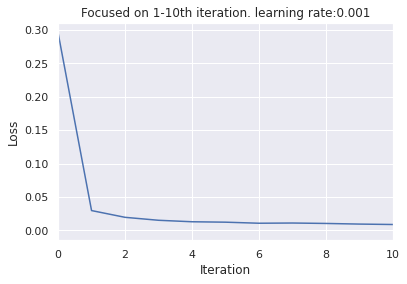

In [97]:
# Plot error curve of traning data
plt.plot(L)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.xlim([0, 80])
plt.title("learning rate:0.001")
plt.show()

plt.plot(L)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.xlim([0, 10])
plt.title("Focused on 1-10th iteration. learning rate:0.001")
plt.show()

In [ ]:
# Repeat the procedure with 0 & 2
cond_test = (y_test == 0) + (y_test == 2)
binary_x_test = x_test[cond_test, :]
binary_y_test = y_test[cond_test]*1.

binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 2] = 1 

In [ ]:
select_two_class(X_train, X_test, y_train, y_test, cls_1, cls_2)

In [ ]:
w, b, error, L = optimize(binary_X_train, binary_y_train)

In [ ]:
y_test_pred = np.zeros(binary_x_test.shape[0])
for row in range(binary_x_test.shape[0]):
    y_test_pred[row] = predict(binary_x_test[row], w, b)
    
y_pred

In [ ]:
(y_test_pred == binary_y_test).sum()/binary_x_test.shape[0]

In [ ]:
cond = (y_train == 4) + (y_train == 9)
binary_x_train_4_9 = x_train[cond, :]
binary_y_train_4_9 = y_train[cond]*1.

binary_y_train_4_9[binary_y_train_4_9 == 4] = -1
binary_y_train_4_9[binary_y_train_4_9 == 9] = 1 

In [ ]:
w, b, error, L = optimize(binary_x_train_4_9, binary_y_train_4_9)

In [ ]:
cond_test_4_9 = (y_test == 4) + (y_test == 9)
binary_x_test_4_9 = x_test[cond_test, :]
binary_y_test_4_9 = y_test[cond_test]*1.

binary_y_test_4_9[binary_y_test_4_9 == 4] = -1
binary_y_test_4_9[binary_y_test_4_9 == 9] = 1 

In [ ]:
y_test_pred = np.zeros(binary_x_test_4_9.shape[0])
for row in range(binary_x_test_4_9.shape[0]):
    y_test_pred[row] = predict(binary_x_test_4_9[row], w, b)
    
y_pred

In [ ]:
(y_test_pred == binary_y_test_4_9).sum()/binary_x_test_4_9.shape[0]

In [ ]:
binary_x_test_4_9.shape[0]==binary_y_test_4_9.shape[0]

In [ ]:
plt.plot(L)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.xlim([0,20])
plt.title("activation: sigmoid, learning rate:0.001")
#plt.savefig("w1-example-loss-sigmoid.png")
plt.show()

## 3: Multi-Layer Perceptron

In [ ]:
# One-hot encoding
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]

### Task 3.1: 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (784,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10,activation='softmax'))
# output the model's structure
model.summary()

In [ ]:
# model.compile(loss='CategoricalCrossentropy',
#             optimizer='adam',
#             metrics=['accuracy'])

In [ ]:
# # copied from fashion activity solution
# history = model.fit(x_train, y_train, epochs=20,
#         batch_size=128, validation_split=0.2)

# import matplotlib.pyplot as plt
# fig = plt.figure()
# fig.add_subplot(1,2,1)
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.legend()
# plt.grid(True)
# #plt.xlim([0,120])
# plt.ylim([0,1.0])
# plt.xlabel('epoch')

# fig.add_subplot(1,2,2)
# plt.plot(history.history['accuracy'], label='train accuracy')
# plt.plot(history.history['val_accuracy'], label='val accuracy')
# plt.legend()
# plt.grid(True)
# #plt.xlim([0,120])
# plt.ylim([0,1.0])
# plt.xlabel('epoch')

In [ ]:
#copied form keras https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks
def train_model(model):
    model.compile(loss='CategoricalCrossentropy',
            optimizer='adam',
            metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    model.fit(x_train, y_train, epochs=20,
        batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])
    
train_model(model)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
# check the accuracy of test set.
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

## 4. Convolutional Neural Network

In [ ]:
# recover initial shape
edge = int(np.sqrt(nb_features))
x_train.resize([n_train, edge, edge])
x_test.resize([n_test, edge, edge])

In [ ]:
x_train.shape

In [ ]:
# copied from course material
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout

model = Sequential()

# For CNN: use a simple CNN architecture

model.add(Conv2D(32, kernel_size=(4, 4), strides = (1,1), padding = 'same',activation='relu',input_shape=(28,28,1))) #128 is batch size
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(4, 4), strides = (2,2), padding = 'same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(4, 4),strides = (2,2), padding = 'same', activation='relu',))

model.add(Flatten())
# model.add(Dropout(0.25)) # to prevent overfitting

# model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(10, activation='softmax'))
#
# CNN changes end here
#

# output the model's structure
model.summary()

In [ ]:
x_train.shape

In [ ]:
#copied form keras https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks
def train_model(model, x_train, y_train, ep=20, batch=128, split=0.2):
    model.compile(loss='CategoricalCrossentropy',
            optimizer='adam',
            metrics=['accuracy'])

    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    model.fit(x_train, y_train, epochs=ep,
        batch_size=batch, validation_split=split, callbacks=[tensorboard_callback])

    
    
    
x_train = tf.expand_dims(x_train, axis=-1) # copied https://stackoverflow.com/questions/63279168/valueerror-input-0-of-layer-sequential-is-incompatible-with-the-layer-expect
train_model(model, x_train, y_train)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
x_test = tf.expand_dims(x_test, axis=-1)  # should update name probably

In [ ]:
x_train.shape

In [ ]:
x_train = tf.expand_dims(x_train, axis=-1) 

In [ ]:
_,test_accu = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.4f' % test_accu)

y_predict = model.predict(x_test[:16])
print(y_predict[:4].round(3))

import numpy as np
plt.figure(figsize=(10,10))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(),cmap='gray') # For CNN, add squeeze() to convert (32,32,1) to (32,32)
    predict_class = np.argmax(y_predict[i])
    plt.title("%s(%.2f) (%s)" % (class_names[predict_class], np.max(y_predict[i]),class_names[y_test[i]]))


## Multi-task learning

In [ ]:
# Load data

import keras.datasets.fashion_mnist as fashion_mnist
from keras.utils import to_categorical

def load_data():
    # train_X: (60000, 28, 28)
    # train_y: (60000,)
    # test_X: (10000, 28, 28)
    # test_y: (10000,)
    (train_X, train_y_1), (test_X, test_y_1) = fashion_mnist.load_data()
    n_class_1 = 10
    # map to new label
    train_y_2 = list (0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in train_y_1)
    test_y_2 = list (0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in test_y_1) 
    n_class_2 = 3
    # train_X: (60000, 28, 28, 1)
    # test_X: (10000, 28, 28, 1)
    # train_y: (60000, n_class = 10)
    # test_y: (10000, n_class = 3)
    train_X= np.expand_dims (train_X, axis=3) 
    test_X= np.expand_dims (test_X, axis=3)
    train_y_1= to_categorical (train_y_1, n_class_1) 
    test_y_1 = to_categorical (test_y_1, n_class_1) 
    train_y_2 = to_categorical (train_y_2, n_class_2) 
    test_y_2 = to_categorical (test_y_2, n_class_2)
    
    return train_X, train_y_1, train_y_2, test_X, test_y_1, test_y_2

x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = load_data()

In [ ]:
y_train.shape

In [ ]:
# copied from course material

# Task 1 
model_1 = Sequential()

# For CNN: use a simple CNN architecture

model_1.add(Conv2D(32, kernel_size=(3, 3), strides = (1,1), padding = 'same',activation='relu',input_shape=(28,28,1))) #128 is batch size
model_1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model_1.add(Conv2D(64, kernel_size=(3, 3), strides = (1,1), padding = 'same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model_1.add(Conv2D(128, kernel_size=(3, 3),strides = (1,1), padding = 'same', activation='relu',))

model_1.add(Flatten())
# model.add(Dropout(0.25)) # to prevent overfitting

# model.add(Dropout(0.5)) # to prevent overfitting
model_1.add(Dense(3136, activation='relu'))
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

# CNN changes end here
#

# output the model's structure
model_1.summary()

In [ ]:
# Check the learning rate...


model_1.compile(loss='CategoricalCrossentropy',
        optimizer='adam',
        metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model_1.fit(x_train, y_train_1, epochs=5,
    batch_size=10, callbacks=[tensorboard_callback])


In [ ]:
# copied from course material

# Task 1 
model_2 = Sequential()

# For CNN: use a simple CNN architecture

model_2.add(Conv2D(32, kernel_size=(3, 3), strides = (1,1), padding = 'same',activation='relu',input_shape=(28,28,1))) #128 is batch size
model_2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model_2.add(Conv2D(64, kernel_size=(3, 3), strides = (1,1), padding = 'same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model_2.add(Conv2D(128, kernel_size=(3, 3),strides = (1,1), padding = 'same', activation='relu',))

model_2.add(Flatten())
# model.add(Dropout(0.25)) # to prevent overfitting

# model.add(Dropout(0.5)) # to prevent overfitting
model_2.add(Dense(3136, activation='relu'))
model_2.add(Dense(1024, activation='relu'))
model_2.add(Dense(3, activation='softmax'))

# CNN changes end here
#

# output the model's structure
model_2.summary()

In [ ]:
# Check the learning rate...


model_2.compile(loss='CategoricalCrossentropy',
        optimizer='adam',
        metrics=['accuracy'])

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model_1.fit(x_train, y_train_2, epochs=5,
    batch_size=10, callbacks=[tensorboard_callback])


In [ ]:
def create_multi_task_learning_model(gamma):
# copied from https://towardsdatascience.com/multi-task-learning-for-computer-vision-classification-with-keras-36c52e6243d2
    inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='input')

    main_branch = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1)(inputs)
    main_branch = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(main_branch)
    main_branch = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1)(main_branch)
    main_branch = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(main_branch)
    main_branch = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1)(main_branch)
    main_branch = tf.keras.layers.Flatten()(main_branch)
    main_branch = tf.keras.layers.Dense(3136, activation='relu')(main_branch)

    task_1_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
    task_1_branch = tf.keras.layers.Dense(100, activation='relu')(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(10, activation='softmax', name='task_1_output')(task_1_branch)


    task_2_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
    task_2_branch = tf.keras.layers.Dense(100, activation='relu')(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(3, activation='softmax', name='task_2_output')(task_2_branch)

    model = tf.keras.Model(inputs = inputs, outputs = [task_1_branch, task_2_branch])
    
    return model

In [ ]:
def compile_multitask_model(model, gamma):
        
    model.compile(optimizer='adam',
                  loss={'task_1_output': 'categorical_crossentropy', 
                        'task_2_output': 'binary_crossentropy'},
                  loss_weights={'task_1_output': gamma, 
                                'task_2_output': 1 - gamma}, 
                  metrics=['accuracy'])
        
    return model